In [1]:
import numpy as np 
import pandas as pd 
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import gensim
import gensim.downloader as gensim_api

In [4]:
embeddings=gensim_api.load("word2vec-google-news-300")

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


UsageError: Line magic function `%` not found.


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def label_sentiment(score):
    if score > 3:
        return 'positive'
    else:
        return 'negative'

### Randomizing and Reading sample of the whole dataset (40%) :

In [8]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\santh\Desktop\DS595-NLP\AmazonDataset\Reviews.csv'

# Read the CSV file and sample 10% of the data
df = pd.read_csv(file_path).sample(frac=0.10, random_state=42)

# Display the selected subset of the dataset
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [9]:
df['sentiment'] = df['Score'].apply(label_sentiment)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,positive
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,positive
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,negative
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",negative
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,positive


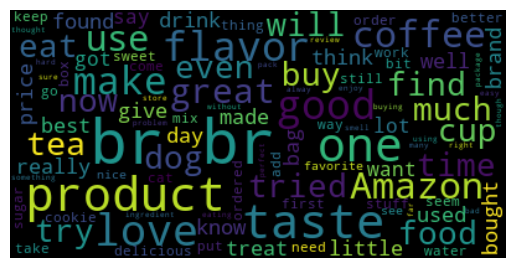

In [11]:
###############################
# Wordcloud
###############################

text = " ".join(i for i in df["Text"])

wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

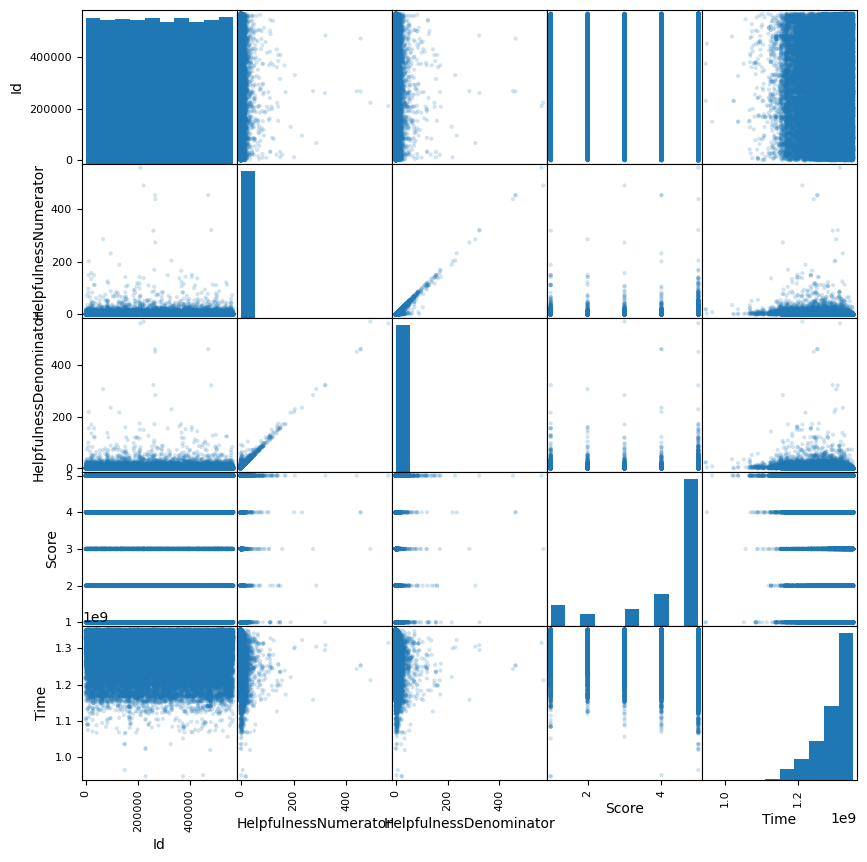

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Scatter Matrix
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

# Density Matrix
##df.plot(kind='kde')
#plt.show()


In [13]:
import torch
torch.cuda.is_available()

True

In [14]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Display the counts
print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
sentiment
positive    44496
negative    12349
Name: count, dtype: int64


In [15]:
def perform_eda(data):
    # Display basic information about the dataset
    print("Basic Information:")
    print(data.info())
    
    # Summary statistics of numerical columns
    print("\nSummary Statistics:")
    print(data.describe())
    
    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())
    
    # Distribution of target variable (assuming 'Score' is the target)
    print("\nTarget Variable Distribution:")
    print(data['Score'].value_counts())

# Assuming you have loaded the data into 'data' dataframe
perform_eda(df)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 56845 entries, 165256 to 39365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56845 non-null  int64 
 1   ProductId               56845 non-null  object
 2   UserId                  56845 non-null  object
 3   ProfileName             56845 non-null  object
 4   HelpfulnessNumerator    56845 non-null  int64 
 5   HelpfulnessDenominator  56845 non-null  int64 
 6   Score                   56845 non-null  int64 
 7   Time                    56845 non-null  int64 
 8   Summary                 56844 non-null  object
 9   Text                    56845 non-null  object
 10  sentiment               56845 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB
None

Summary Statistics:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count   56845.000000          56845.000000        

In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()
print("Original Sentiment Distribution:")
print(sentiment_counts)

Original Sentiment Distribution:
sentiment
positive    44496
negative    12349
Name: count, dtype: int64


In [17]:
# Check if the dataset is imbalanced
if sentiment_counts.min() / sentiment_counts.max() < 0.5:  # Adjust the threshold as needed
    print("Dataset is imbalanced. Resampling...")

    # Use RandomOverSampler to balance the classes by oversampling the minority class
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(df['Text'].values.reshape(-1, 1), df['sentiment'])

    # Convert the resampled data back to DataFrame
    df_resampled = pd.DataFrame({'Text': X_resampled.flatten(), 'sentiment': y_resampled})

    # Count the occurrences of each sentiment label after resampling
    resampled_sentiment_counts = df_resampled['sentiment'].value_counts()
    print("Resampled Sentiment Distribution:")
    print(resampled_sentiment_counts)

    # Use the resampled dataset for further analysis
    X_resampled = df_resampled['Text']
    y_resampled = df_resampled['sentiment']
else:
    print("Dataset is already balanced.")

Dataset is imbalanced. Resampling...
Resampled Sentiment Distribution:
sentiment
positive    44496
negative    44496
Name: count, dtype: int64


In [18]:
df_resampled.describe()

,Text,sentiment
count,88992,88992
unique,52221,2
top,"This review will make me sound really stupid, ...",positive
freq,90,44496


In [19]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,56845.000000,56845.000000,56845.000000,56845.000000,5.684500e+04
mean,284282.738939,1.751341,2.232210,4.191837,1.295998e+09
std,164404.023421,7.639460,8.345434,1.305676,4.819756e+07
min,3.000000,0.000000,0.000000,1.000000,9.482400e+08
25%,142122.000000,0.000000,0.000000,4.000000,1.271117e+09
50%,283603.000000,0.000000,1.000000,5.000000,1.310861e+09
75%,426620.000000,2.000000,2.000000,5.000000,1.332634e+09
max,568446.000000,559.000000,569.000000,5.000000,1.351210e+09


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize WordNet lemmatizer and get English stopwords
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #Removes square brackets and their contents from the text.
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub('<.*?>+', '', text)#Removes HTML tags from the text.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#Removes punctuation marks from the text.
    text = re.sub('\n', '', text) #Removes newline characters from the text.
    text = re.sub('\w*\d\w*', '', text)  # Remove digits
     # Remove remaining punctuation (excluding hyphens and apostrophes)
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = [word for word in text.split() if word not in stopwords]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Apply preprocessing to the 'News' column in df_real,df_combined and df_fake
df_resampled['Text'] = df_resampled['Text'].apply(clean)

In [23]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88992 entries, 0 to 88991
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       88992 non-null  object
 1   sentiment  88992 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [24]:
# Assuming df_resampled is the resampled DataFrame with 'Text' and 'sentiment' columns

# Separate features (X) and labels (y)
X = df_resampled['Text']
y = df_resampled['sentiment']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

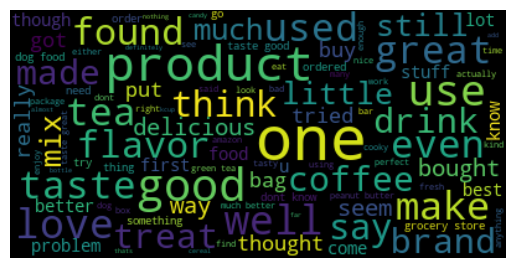

In [25]:
###############################
# Wordcloud
###############################

text = " ".join(i for i in df_resampled["Text"])


wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
df_resampled.head()

,Text,sentiment
0,tried couple brand glutenfree sandwich cooky b...,positive
1,cat love treat ever cant find house pop top bo...,positive
2,little le expected tends muddy taste expected ...,negative
3,first frosted miniwheats original size frosted...,negative
4,want congratulate graphic artist putting entir...,positive


In [27]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)
# Print the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (71193,)
Shape of X_test: (17799,)
Shape of y_train: (71193,)
Shape of y_test: (17799,)


### Models with TF-IDF:

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)),
    ('LightGBM', LGBMClassifier())  # Using LightGBM instead of GradientBoostingClassifier
]


# Iterate over models
for name, model in models:
    # Create a pipeline with TF-IDF vectorizer and the current model
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('model', model)
    ])
    
    # Perform cross-validation using stratified k-fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"Model: {name}")
    print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-------------------------------------------")


Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.8784
Test Accuracy: 0.8834
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      8875
           1       0.90      0.87      0.88      8924

    accuracy                           0.88     17799
   macro avg       0.88      0.88      0.88     17799
weighted avg       0.88      0.88      0.88     17799

-------------------------------------------
Model: Multinomial Naive Bayes
Cross-Validation Mean Accuracy: 0.8663
Test Accuracy: 0.8739
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      8875
           1       0.90      0.85      0.87      8924

    accuracy                           0.87     17799
   macro avg       0.88      0.87      0.87     17799
weighted avg       0.88      0.87      0.87     17799

-------------------------------------------
Model: Random Forest
Cross-Valid

### Models with Word2Vec:

In [29]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Tokenize the text data
X_train_tokenized = [text.split() for text in X_train]

# Train the word2vec model
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Define the function to generate word embeddings
def generate_word_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average word embeddings for the sentence
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no embeddings found

# Apply the function to generate word embeddings for each text in the training and testing sets
X_train_embeddings = np.vstack([generate_word_embeddings(text) for text in X_train])
X_test_embeddings = np.vstack([generate_word_embeddings(text) for text in X_test])

# Define the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)),
    ('LightGBM', LGBMClassifier())  # Using LightGBM instead of GradientBoostingClassifier
]

# Iterate over classifiers
for name, clf in classifiers:
    # Create a pipeline with the classifier
    pipeline = Pipeline([
        ('clf', clf)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_embeddings, y_train, cv=5, scoring='accuracy')
    
    # Train the classifier
    pipeline.fit(X_train_embeddings, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test_embeddings)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("---------------------------------------------")


Classifier: Logistic Regression
Cross-Validation Accuracy: 0.8055 (±0.0041)
Accuracy: 0.8061
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      8875
           1       0.81      0.80      0.80      8924

    accuracy                           0.81     17799
   macro avg       0.81      0.81      0.81     17799
weighted avg       0.81      0.81      0.81     17799

---------------------------------------------
Classifier: Random Forest
Cross-Validation Accuracy: 0.8611 (±0.0031)
Accuracy: 0.8640
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8875
           1       0.88      0.84      0.86      8924

    accuracy                           0.86     17799
   macro avg       0.86      0.86      0.86     17799
weighted avg       0.86      0.86      0.86     17799

---------------------------------------------
[LightGBM] [Info] Number of 

### BERT (without fine-tune) for review classification:


In [30]:
for review in df['Text'][:3]:
    print(review)
    print('\n')


Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They're crunchy and true to the texture of the other "real" cookies that aren't gluten-free.  Some might think that the filling makes them a bit too sweet, but for me that just means I've satisfied my sweet tooth sooner!  The chocolate version from Glutino is just as good and has a true "chocolatey" taste - something that isn't there with the other gluten-free brands out there.


My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these are perfect for her. I've given her all three flavors and she seems to like them all equally. They do tend to dry out by the time I near the end of the bottle, however. The flip-top lid is very handy. Very nice, inexpensive kitty treats. I have yet to meet a cat that doesn't just love these!


A little less than 

In [31]:
df['sentiment'].value_counts()

sentiment
positive    44496
negative    12349
Name: count, dtype: int64

In [32]:
df['Text']

165256    Having tried a couple of other brands of glute...
231465    My cat loves these treats. If ever I can't fin...
427827    A little less than I expected.  It tends to ha...
433954    First there was Frosted Mini-Wheats, in origin...
70260     and I want to congratulate the graphic artist ...
                                ...                        
408178    I am so glad to have found this product.  My d...
349411    I am just now getting into teas. I have had he...
180583    This is one of those products that the troops ...
323331    The items in the easter pail were not up to pa...
39365     I purchased this product in response to a reco...
Name: Text, Length: 56845, dtype: object

In [33]:
import pandas as pd

# Assuming df contains the original dataset with 'Text' and 'sentiment' columns

# Separate positive and negative sentiment samples
positive_samples = df[df['sentiment'] == 'positive']
negative_samples = df[df['sentiment'] == 'negative']

# Resample negative sentiment samples to match the count of positive samples
negative_samples_resampled = negative_samples.sample(n=positive_samples.shape[0], replace=True, random_state=42)

# Concatenate positive samples with resampled negative samples
balanced_subset = pd.concat([positive_samples, negative_samples_resampled])

# Shuffle the balanced subset
balanced_subset = balanced_subset.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balanced subset sentiment distribution
print("Balanced Subset Sentiment Distribution:")
print(balanced_subset['sentiment'].value_counts())

# Include the Text column in the final DataFrame
final_df = balanced_subset[['Text', 'sentiment']]

# Display the first few rows of the final DataFrame
print(final_df.head())


Balanced Subset Sentiment Distribution:
sentiment
positive    44496
negative    44496
Name: count, dtype: int64
                                                Text sentiment
0  I got hooked on Japanese Curry when I was on m...  positive
1  My allergy prone dog loves these treats.  He c...  positive
2  I have been buying Lemonade in the 2 quart bot...  positive
3  This is an excellent product and arrives witho...  positive
4  This new product certainly takes advantage of ...  negative


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88992 entries, 0 to 88991
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       88992 non-null  object
 1   sentiment  88992 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [35]:
import os
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Extract text and sentiment columns from the dataframe
texts = final_df['Text'].tolist()
true_sentiments = final_df['sentiment'].tolist()

# Truncate texts to maximum sequence length of 512 tokens
max_length = 512
truncated_texts = [text[:max_length] for text in texts]

# Perform sentiment classification for each truncated text
predicted_results = classifier(truncated_texts)

# Extract labels from predicted results and convert to lowercase
predicted_sentiments = [result['label'].lower() for result in predicted_results]

# Convert sentiment labels to binary numeric values
true_labels = [1 if sentiment == 'positive' else 0 for sentiment in true_sentiments]
predicted_labels = [1 if sentiment == 'positive' else 0 for sentiment in predicted_sentiments]

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



C:\Users\santh\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\santh\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Accuracy: 0.8200624775260698
Precision: 0.8166818616441707
Recall: 0.8254000359582884
F1-score: 0.8210178054478188


In [36]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Specify the directory to save the tokenizer and model
save_directory = os.getcwd()

# Save the tokenizer and model to the specified directory
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

# Optional: Verify the saved files
print("Model files saved successfully in:", save_directory)

# Additional cleanup to avoid memory leaks
del tokenizer, model
torch.cuda.empty_cache()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model files saved successfully in: C:\Users\santh\Desktop\DS595-NLP


In [37]:
print(save_directory)

C:\Users\santh\Desktop\DS595-NLP


In [38]:
import transformers
print("Transformers version:", transformers.__version__)


Transformers version: 4.32.1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56845 entries, 165256 to 39365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56845 non-null  int64 
 1   ProductId               56845 non-null  object
 2   UserId                  56845 non-null  object
 3   ProfileName             56845 non-null  object
 4   HelpfulnessNumerator    56845 non-null  int64 
 5   HelpfulnessDenominator  56845 non-null  int64 
 6   Score                   56845 non-null  int64 
 7   Time                    56845 non-null  int64 
 8   Summary                 56844 non-null  object
 9   Text                    56845 non-null  object
 10  sentiment               56845 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88992 entries, 0 to 88991
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       88992 non-null  object
 1   sentiment  88992 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


### BERT (with fine-tune) for review classification :

In [41]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


In [42]:
import os
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

sampled_df = final_df.sample(frac=0.05, random_state=42)

# Define a custom data collator for sequence classification
class CustomDataCollator:
    def __call__(self, features):
        input_ids = torch.tensor([feature["input_ids"] for feature in features], dtype=torch.long)
        labels = torch.tensor([feature["labels"] for feature in features], dtype=torch.long)
        return {"input_ids": input_ids, "labels": labels}

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Split sampled data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(sampled_df['Text'], sampled_df['sentiment'], test_size=0.2, random_state=42)

# Tokenize the input texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=512)

# Convert labels to tensors
train_labels = torch.tensor([1 if label == 'positive' else 0 for label in train_labels.tolist()])
val_labels = torch.tensor([1 if label == 'positive' else 0 for label in val_labels.tolist()])

# Create dataset
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {"input_ids": self.encodings["input_ids"][idx], "labels": self.labels[idx]}

    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)

# Define the training arguments with current directory
current_directory = os.getcwd()
training_args = TrainingArguments(
    output_dir=os.path.join(current_directory, "results"),  # output directory (current directory)
    num_train_epochs=3,  # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=10,   # batch size for evaluation
    logging_dir=os.path.join(current_directory, "logs"),  # directory for storing logs (current directory)
    logging_steps=100,  # log every x updates steps
    load_best_model_at_end=True,  # load the best model at the end of training
    evaluation_strategy="steps",  # evaluate every `logging_steps`
)

# Define the Trainer
trainer = Trainer(
    model=model,  # the instantiated 🤗 Transformers model to be trained
    args=training_args,  # training arguments, defined above
    train_dataset=train_dataset,  # training dataset
    eval_dataset=val_dataset,     # evaluation dataset
    data_collator=CustomDataCollator(),
)

# Fine-tune the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation metrics
print("Evaluation Results:", eval_results)

# Calculate additional evaluation metrics
val_predictions = trainer.predict(val_dataset)
val_pred_labels = val_predictions.predictions.argmax(axis=1)
accuracy = accuracy_score(val_labels, val_pred_labels)
precision = precision_score(val_labels, val_pred_labels)
recall = recall_score(val_labels, val_pred_labels)
f1 = f1_score(val_labels, val_pred_labels)

# Print additional evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\santh\anaconda3\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(
C:\Users\santh\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1150: UserWarning: expandable_segments not supported on this platform (Triggered internally at ..\c10/cuda/CUDAAllocatorConfig.h:30.)
  return t.to(device, dtype if t.is_floating_point() or t.is_complex() else None, non_blocking)
We strongly recommend pass

Step,Training Loss,Validation Loss
100,0.722700,0.711026
200,0.703500,0.692825
300,0.704800,0.698915
400,0.704500,0.698612
500,0.693100,0.716182
600,0.715000,0.701669
700,0.699600,0.693112
800,0.699000,0.694068
900,0.702500,0.693455
1000,0.698500,0.697499


Evaluation Results: {'eval_loss': 0.6974994540214539, 'eval_runtime': 73.8659, 'eval_samples_per_second': 12.049, 'eval_steps_per_second': 1.205, 'epoch': 3.0}
Accuracy: 0.48651685393258426
Precision: 0.48651685393258426
Recall: 1.0
F1-score: 0.654572940287226


### Bert ( With LoRa ) for Review Classification:

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from peft import LoraConfig, get_peft_model
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and preprocess your dataset (assuming final_df is your dataset)
# Sample 3% of the data
sampled_df = final_df.sample(frac=0.05, random_state=42)

# Split sampled data into train and evaluation sets
train_df, eval_df = train_test_split(sampled_df, test_size=0.1, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = str(self.dataframe.iloc[idx]['Text'])
        label = int(self.dataframe.iloc[idx]['sentiment'] == 'positive')

        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length)

        return {
            'input_ids': torch.tensor(encoding['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(encoding['attention_mask'], dtype=torch.long),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Instantiate BERT tokenizer and define model configuration
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
lora_config = LoraConfig(r=16, lora_alpha=16, lora_dropout=0.1, bias="none")

# Integrate BERT model with LoRA
lorabert = get_peft_model(bert_model, lora_config)

# Define optimizer
optimizer = AdamW(lorabert.parameters(), lr=5e-5)

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lorabert.to(device)

# Create datasets and dataloaders
train_dataset = CustomDataset(train_df, tokenizer)
eval_dataset = CustomDataset(eval_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=4)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    lorabert.train()
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = lorabert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loop.set_postfix(loss=loss.item())


# Evaluation loop
lorabert.eval()
all_labels = []
all_predictions = []
eval_loop = tqdm(eval_loader, desc="Evaluation")
with torch.no_grad():
    for batch in eval_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = lorabert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        all_labels.extend(labels.to('cpu').numpy())
        all_predictions.extend(predictions.to('cpu').numpy())

        eval_loop.set_postfix()

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Classification report
classification_rep = classification_report(all_labels, all_predictions, target_names=["negative", "positive"])
print("Classification Report:\n", classification_rep)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\santh\anaconda3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/2 Training:   0%|          | 0/1002 [00:00<?, ?it/s]

Epoch 2/2 Training:   0%|          | 0/1002 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/112 [00:00<?, ?it/s]

Accuracy: 0.8449438202247191
Precision: 0.9204545454545454
Recall: 0.7465437788018433
F1-score: 0.8244274809160306
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.94      0.86       228
    positive       0.92      0.75      0.82       217

    accuracy                           0.84       445
   macro avg       0.86      0.84      0.84       445
weighted avg       0.86      0.84      0.84       445

